In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt 
import mglearn
from sklearn.model_selection import train_test_split
import os
import seaborn as sns
plt.rcParams['font.sans-serif']=['SimHei']#显示中文标签 
plt.rcParams['axes.unicode_minus']=False

In [114]:
# matplotlib的交互式功能
%matplotlib widget

ModuleNotFoundError: No module named 'ipympl'

# 颜色编码

红色系列：

火焰红：`#e25822`
珊瑚红：`#ff6f61`
镉红：`#e60012`
大红：`#ff0000`

蓝色系列：

湖蓝：`#4285f4`
天蓝：`#00a1f1`
宝蓝：`#005cbf`
钢蓝：`#4682b4`

绿色系列：

橄榄绿：`#3d9970`
橙绿：`#ff9933`
酸橙绿：`#aaff00`
深绿：`#006400`

黄色和橙色系列：

金黄：`#ffd700`
土豆黄：`#ffd700`
珊瑚黄：`#ffcc00`
胡萝卜橙：`#ed9121`

紫色和粉红色系列：

紫罗兰：`#8a2be2`
玫瑰红：`#ff007f`
粉红：`#ff69b4`
藕色：`#b4a8bd`

灰色系列：

银灰：`#c0c0c0`
钢灰：`#808080`
烟灰：`#a2a2a2`
暗灰：`#696969`

# 示例一

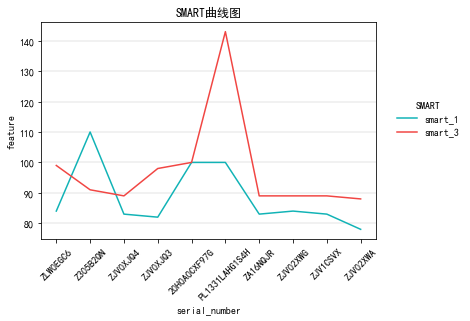

In [4]:
#绘制折线图1
plt.plot(X,y1,label = 'smart_1',linestyle='-',color = '#11b3b6')
plt.plot(X,y2,label = 'smart_3',linestyle='-',color = '#f14643')
plt.xlabel('serial_number')
plt.ylabel('feature')
plt.legend(bbox_to_anchor=(1.05, 0.45), loc=3, borderaxespad=0, frameon=False, title = 'SMART')#绘制图例
my_x_ticks = np.arange(0,len(X),1)#设置横坐标间隔为1
plt.xticks(my_x_ticks, rotation = 45)#横轴按角度显示
plt.title('SMART曲线图')
plt.grid(axis = 'y',linewidth=0.35)#绘制网格

# 示例二

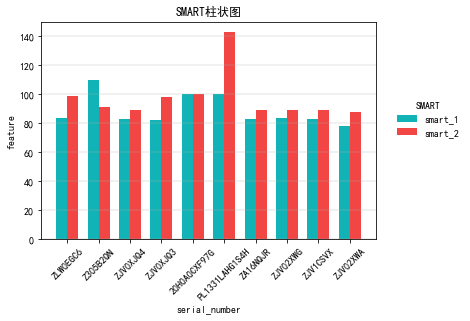

In [5]:
#绘制直方图
fig, ax = plt.subplots()
ind = np.arange(len(X))+1#设置柱状图个数及位置
width = 0.35#柱状图宽度
rects1 = ax.bar(ind-width/2, y1, width, color='#11b3b6', label='smart_1')
rects2 = ax.bar(ind+width/2, y2, width, color='#f14643', label='smart_2')#X1加减的值为width的二分之一
ax.set_xlabel('serial_number')
ax.set_ylabel('feature')
ax.set_title('SMART柱状图')
ax.legend(bbox_to_anchor=(1.05, 0.45), loc=3, borderaxespad=0, frameon=False, title = 'SMART')#绘制图例
plt.xticks(ind,X,rotation = 45)#横轴按角度显示
plt.grid(axis = 'y',linewidth=0.35)#绘制网格
plt.show()

# 示例三

Text(40M0A05FF97G, 110, '40M0A05FF97G')

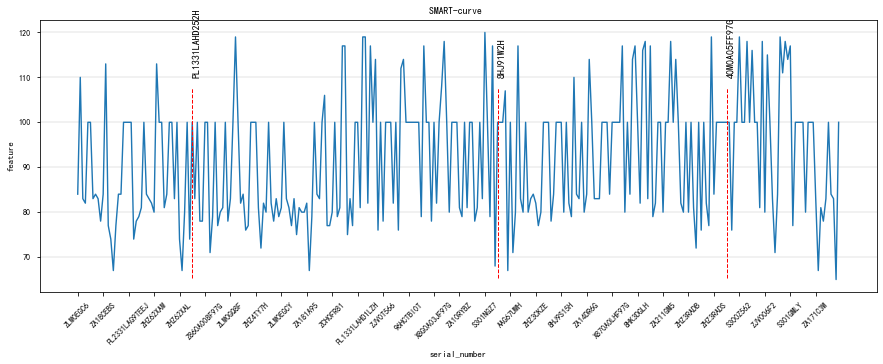

In [23]:
#绘制折线图2
X1 = data['serial_number'][:300]
y11 = data['smart_1_normalized'][:300]
fig = plt.figure(1, (15, 5))
ax = fig.add_subplot(1,1,1)
ax.plot(X1,y11,label = 'smart_3',linestyle='-')
plt.xlabel('serial_number')
plt.ylabel('feature')
my_x_ticks = np.arange(0,len(X1),10)#设置横坐标间隔为10
plt.xticks(my_x_ticks, rotation = 45)#rotation文字旋转方向
plt.title('SMART-curve ')#图标题
plt.grid(axis = 'y',linewidth=0.35)#绘制网格
plt.style.use('seaborn-paper')#绘制背景色
plt.axvline(data['serial_number'][45],color = 'red',linestyle = '--',lw = 1,ymin = 0.05,ymax = 0.75)#设置参考线
plt.annotate(data['serial_number'][45],xy = (data['serial_number'][45],110),rotation = 90) # 添加注释，xy为文本放置位置，分别为横纵坐标
plt.axvline(data['serial_number'][165],color = 'red',linestyle = '--',lw = 1,ymin = 0.05,ymax = 0.75)
plt.annotate(data['serial_number'][165],xy = (data['serial_number'][165],110),rotation = 90)
plt.axvline(data['serial_number'][255],color = 'red',linestyle = '--',lw = 1,ymin = 0.05,ymax = 0.75)
plt.annotate(data['serial_number'][255],xy = (data['serial_number'][255],110),rotation = 90)

# 示例四

Text(0.5, 1.0, 'SMART-curve ')

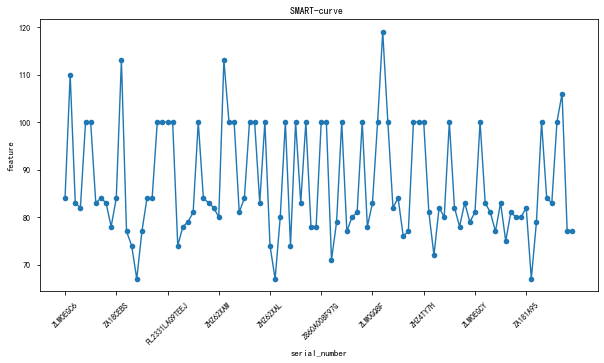

In [20]:
#绘制折线图3
X2 = data['serial_number'][:100]
y12 = data['smart_1_normalized'][:100]
fig = plt.figure(1, (10, 5))
ax = fig.add_subplot(1,1,1)
ax.plot(X2,y12,'o',linestyle='-')#设置线型
plt.xlabel('serial_number')
plt.ylabel('feature')
my_x_ticks = np.arange(0,len(X2),10)#设置横坐标间隔为10
plt.xticks(my_x_ticks, rotation = 45)#rotation文字旋转方向
plt.title('SMART-curve ')#图标题

# 示例五

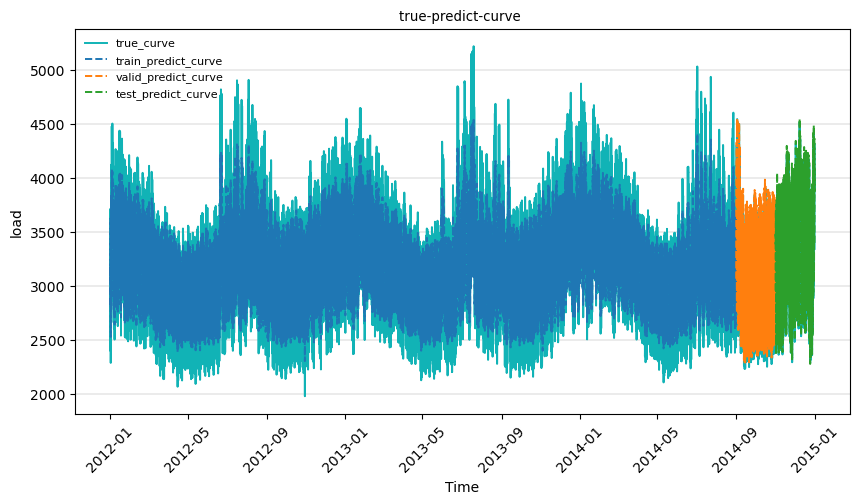

In [4]:
#绘图，原始图，训练图，验证图，测试图
fig = plt.figure(1, (10, 5))
ax = fig.add_subplot(1,1,1)
plt.style.use('seaborn-v0_8-paper') #绘制背景色
plt.grid(axis = 'y',linewidth=0.35) #绘制网格
plt.title('true-predict-curve ') #图标题
plt.xticks(rotation = 45) #rotation文字旋转方向
ax.plot(timeseries_x, timeseries_y, linestyle='-',color = '#11b3b6',label = 'true_curve')
ax.plot(train_plot_x, train_plot_y, linestyle='--',label = 'train_predict_curve')
ax.plot(valid_plot_x, valid_plot_y, linestyle='--',label = 'valid_predict_curve')
ax.plot(test_plot_x, test_plot_y, linestyle='--',label = 'test_predict_curve')
ax.legend(frameon=False) #绘制图例
plt.xlabel('Time')
plt.ylabel(y_true.columns.values[0])
plt.show()

# 示例六

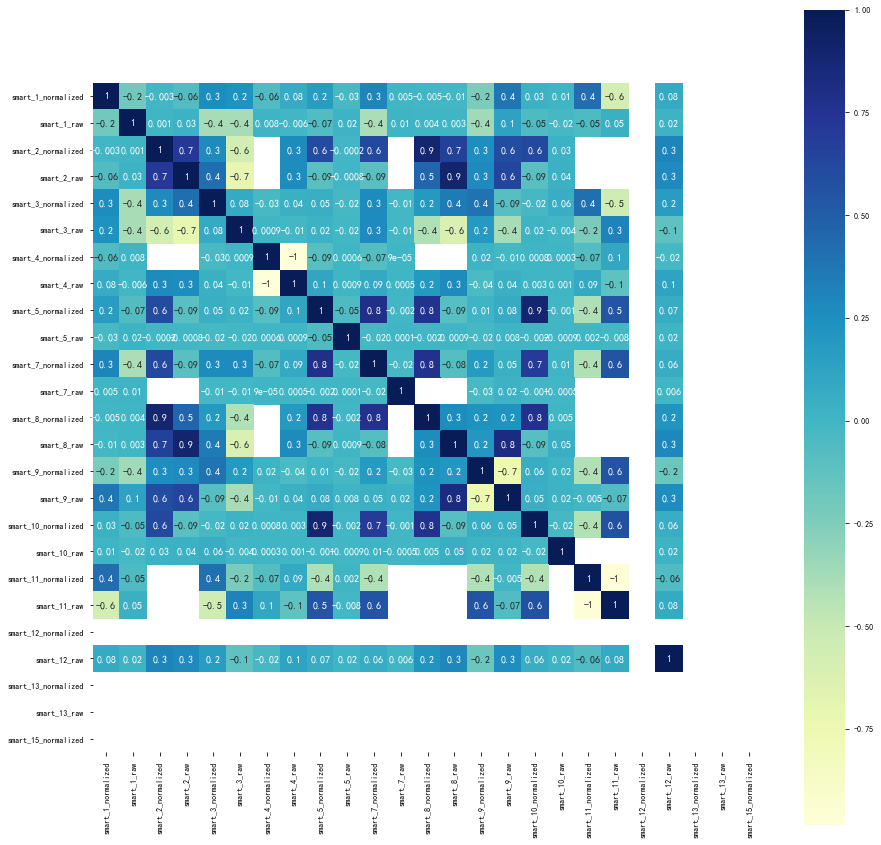

In [91]:
#绘制相关系数矩阵与热力图
a = data.iloc[:,5:30].corr()
plt.subplots(figsize=(15, 15))
sns.heatmap(a , vmax=1, square=True,center=0,cmap="YlGnBu",annot=True,fmt='.1g')
plt.show()

# 示例十

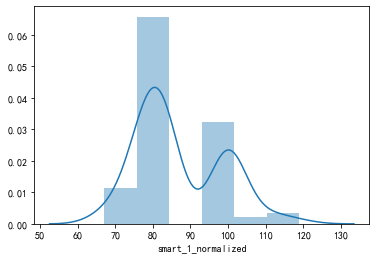

In [10]:
#单属性直方图
sns.distplot(tips['smart_1_normalized'])

# 示例十一

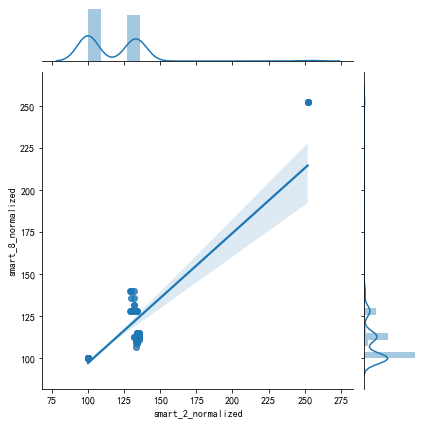

In [16]:
#两两属性的相关性图
tips = data.iloc[:1000,5:]
sns.jointplot(x = 'smart_2_normalized', y = 'smart_8_normalized', data = tips,kind = 'reg')

# 示例十二

([<matplotlib.axis.XTick at 0x2b033891208>,
 <a list of 10 Text xticklabel objects>)

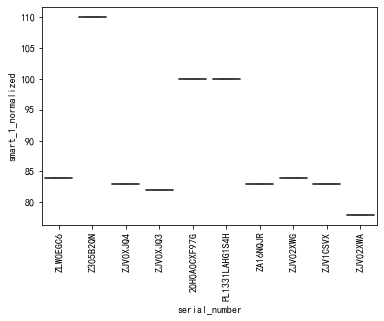

In [21]:
#箱线图
tips = data.iloc[:10,:]
sns.boxplot(x = 'serial_number', y= 'smart_1_normalized', data = tips)
my_x_ticks = np.arange(0,len(tips))#设置横坐标间隔为10
plt.xticks(my_x_ticks, rotation = 90)#rotation文字旋转方向

# 示例十三

用figure()函数画两张图

如果想画两张图则必须使用plt.figure()两次，可以指定num，也可以不指定num，调用两次它会默认加1。

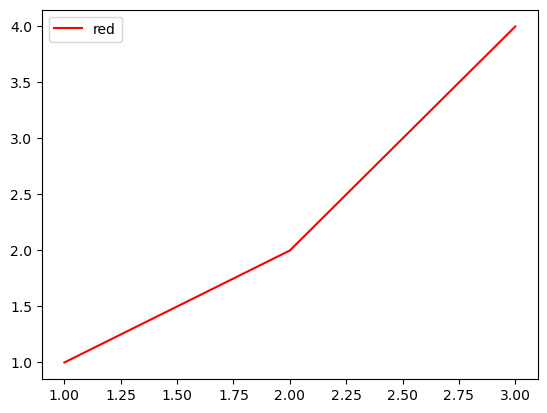

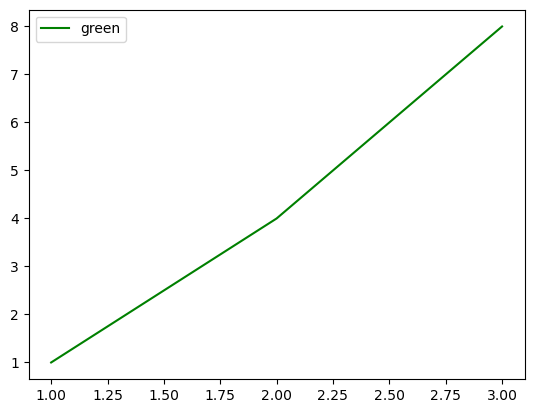

In [2]:
x=[1,2,3]
y1=[1,2,4]
y2=[1,4,8]
 
plt.figure()
plt.plot(x,y1,color = "red",label = "red")
plt.legend()  #无此语句会不显示右下角label
 
plt.figure()
plt.plot(x,y2,color = "green",label = "green")
plt.legend()  #无此语句会不显示右上角label
plt.show()

# 示例十四

Text(0, 0.5, '数值')

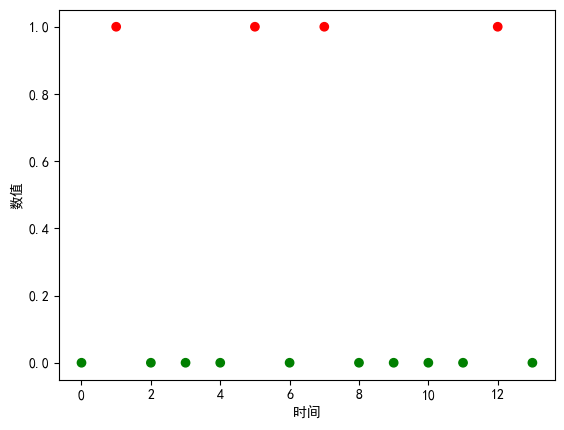

In [8]:
# 原始数据
y = [0,1,0,0,0,1,0,1,0,0,0,0,1,0]
x = range(len(y))

# 循环为标签赋颜色编码
c = []
for i in y:
    if i == 0:
        c.append('green')
    elif i == 1:
        c.append('red')
        
# 绘制不同颜色的散点图
plt.scatter(x=x, y=y, c=c)
plt.xlabel('时间')
plt.ylabel('数值')

Text(0, 0.5, '数值')

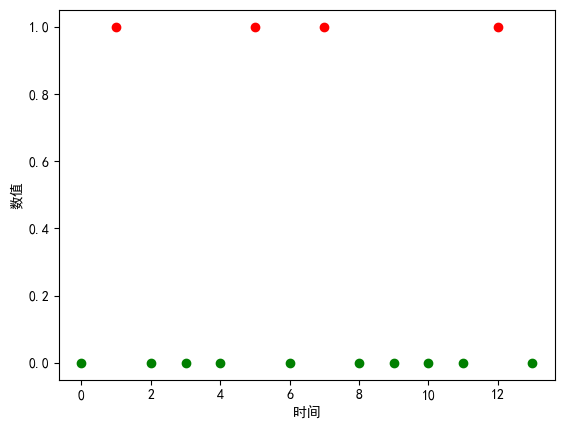

In [9]:
# 原始数据
y = [0,1,0,0,0,1,0,1,0,0,0,0,1,0]
x = range(len(y))

x1 = []
y1 = []
x2 = []
y2 = []

for i in range(len(y)):
    if y[i] == 1:
        x1.append(i)
        y1.append(y[i])
    elif y[i] == 0:
        x2.append(i)
        y2.append(y[i])
        
# 绘制不同颜色的散点图
plt.scatter(x=x1, y=y1, c='red')
plt.scatter(x=x2, y=y2, c='green')
plt.xlabel('时间')
plt.ylabel('数值')

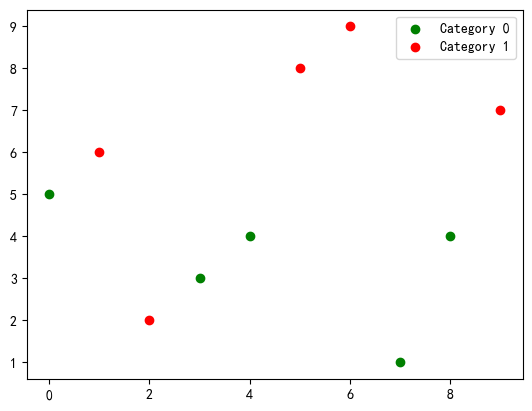

In [17]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
x2 = np.array([5, 6, 2, 3, 4, 8, 9, 1, 4, 7])
y = np.array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1])
y_nums = list(set(y))

# 循环为标签赋颜色编码
c = []
for i in y_nums:
    if i == 0:
        c.append('green')
    elif i == 1:
        c.append('red')

fig, ax = plt.subplots()

for i in y_nums:
    ax.scatter(x1[y == i], x2[y == i], c=c[i], label='Category '+str(i))

ax.legend()
plt.show()

# 示例十五

In [6]:
data = pd.read_csv('../data/energy1.csv', encoding='gbk')
data['time'] = pd.to_datetime(data['time'])

Text(2012-01-02 18:00:00, 4180, '实际报警点')

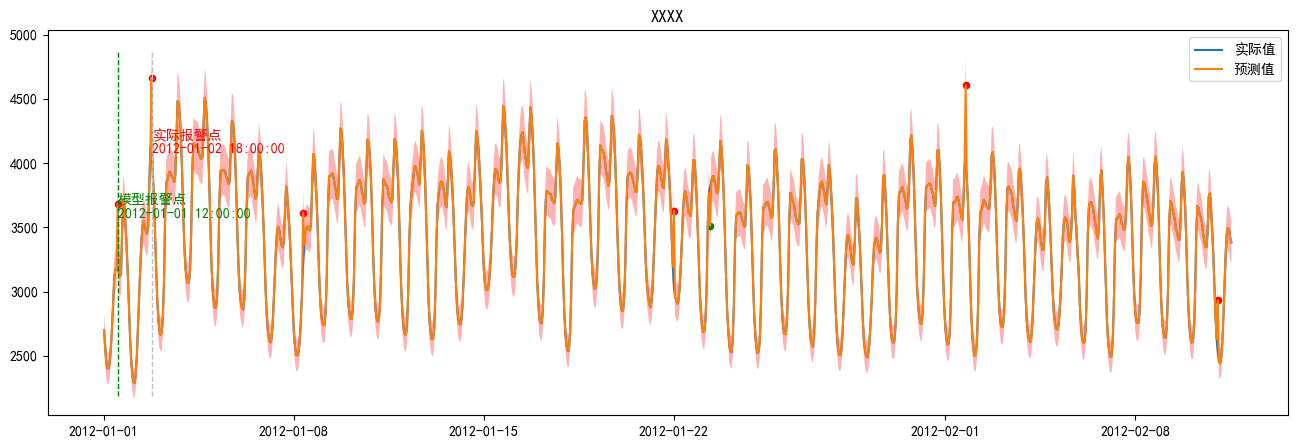

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# 设置上下限阈值，预测值5%-10%之间
threshold = 0.05
time = pd.to_datetime(data['time'])
true = data['实际值'].astype("float")
predict = data['预测值'].astype("float")
plt.figure(figsize=(16, 5))
plt.plot(time, true, linestyle='-')
plt.plot(time, predict, linestyle='-')
plt.legend(["实际值", "预测值"])
plt.title("XXXX")

# 绘制预测阈值带（安全范围的区间）
plt.fill_between(time,
                 predict - predict * threshold,
                 predict + predict * threshold,
                 facecolor='red',
                 alpha=0.3)

# 超限数据
outliner_data_lower = data[(true > predict + predict * threshold)]
# 标记超限数据
outliner_time = outliner_data_lower['time']
outliner_predict = outliner_data_lower['预测值']
plt.scatter(outliner_time, outliner_predict, color = 'green', s=20)

outliner_data_higher = data[(true < predict - predict * threshold)]
# 标记超限数据
outliner_time = outliner_data_higher['time']
outliner_predict = outliner_data_higher['预测值']
plt.scatter(outliner_time, outliner_predict, color = 'red', s=20)

#设置预警参考线
first_time = outliner_data.reset_index(drop=True)['time'][0]
plt.axvline(first_time,
            color='green',
            linestyle='--',
            lw=1,
            ymin=0.05,
            ymax=0.95)
plt.annotate(first_time, xy=(first_time, 3580), rotation=0,
             color='green')  # 添加注释，xy为文本放置位置，分别为横纵坐标
plt.annotate('模型报警点', xy=(first_time, 3680), rotation=0, color='green')  # 添加描述

# 实际报警点
point = '2012-01-02 18:00:00'
point_time = pd.to_datetime(point)
plt.axvline(point_time,
            color='#c0c0c0',
            linestyle='--',
            lw=1,
            ymin=0.05,
            ymax=0.95)
plt.annotate(point_time, xy=(point_time, 4080), rotation=0, color='red')
plt.annotate('实际报警点', xy=(point_time, 4180), rotation=0, color='red')

# 示例十六

In [36]:
data = pd.read_csv('../data/energy1.csv')
data['time'] = pd.to_datetime(data['time'])

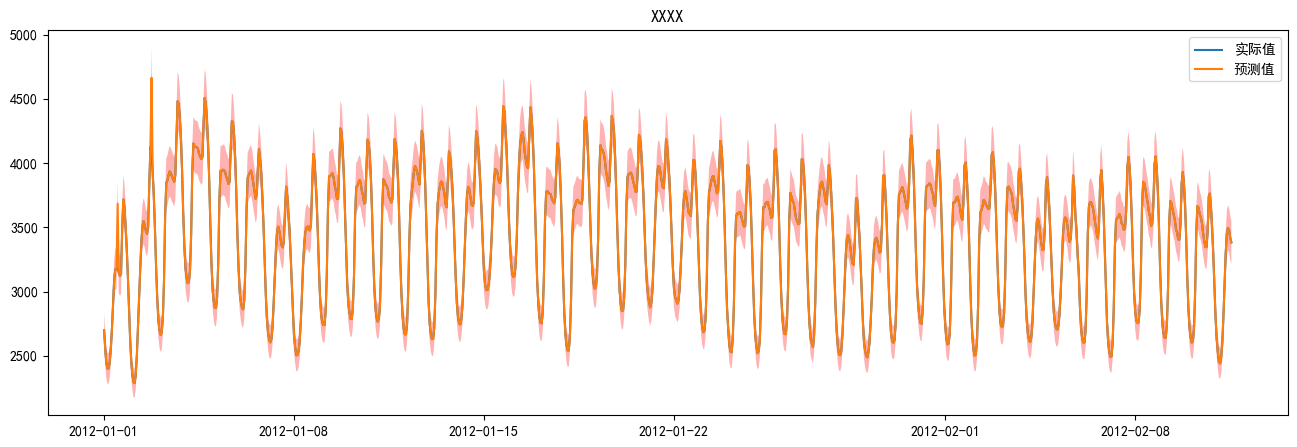

In [40]:
import matplotlib.pyplot as plt

# 设置上下限阈值，预测值5%-10%之间
threshold = 0.05
time = data['time']
true = data['实际值'].astype("float")
predict = data['预测值'].astype("float")
plt.figure(figsize=(16, 5))
plt.plot(time, true)
plt.plot(time, predict)
plt.legend(["实际值", "预测值"])
plt.title("XXXX")

# 绘制预测阈值带（安全范围的区间）
plt.fill_between(time,
                 predict - predict * threshold,
                 predict + predict * threshold,
                 facecolor='red',
                 alpha=0.3)

# 示例十七

In [7]:
data = pd.read_csv('../data/energy2.csv', encoding='gbk')
data['time'] = pd.to_datetime(data['time'])

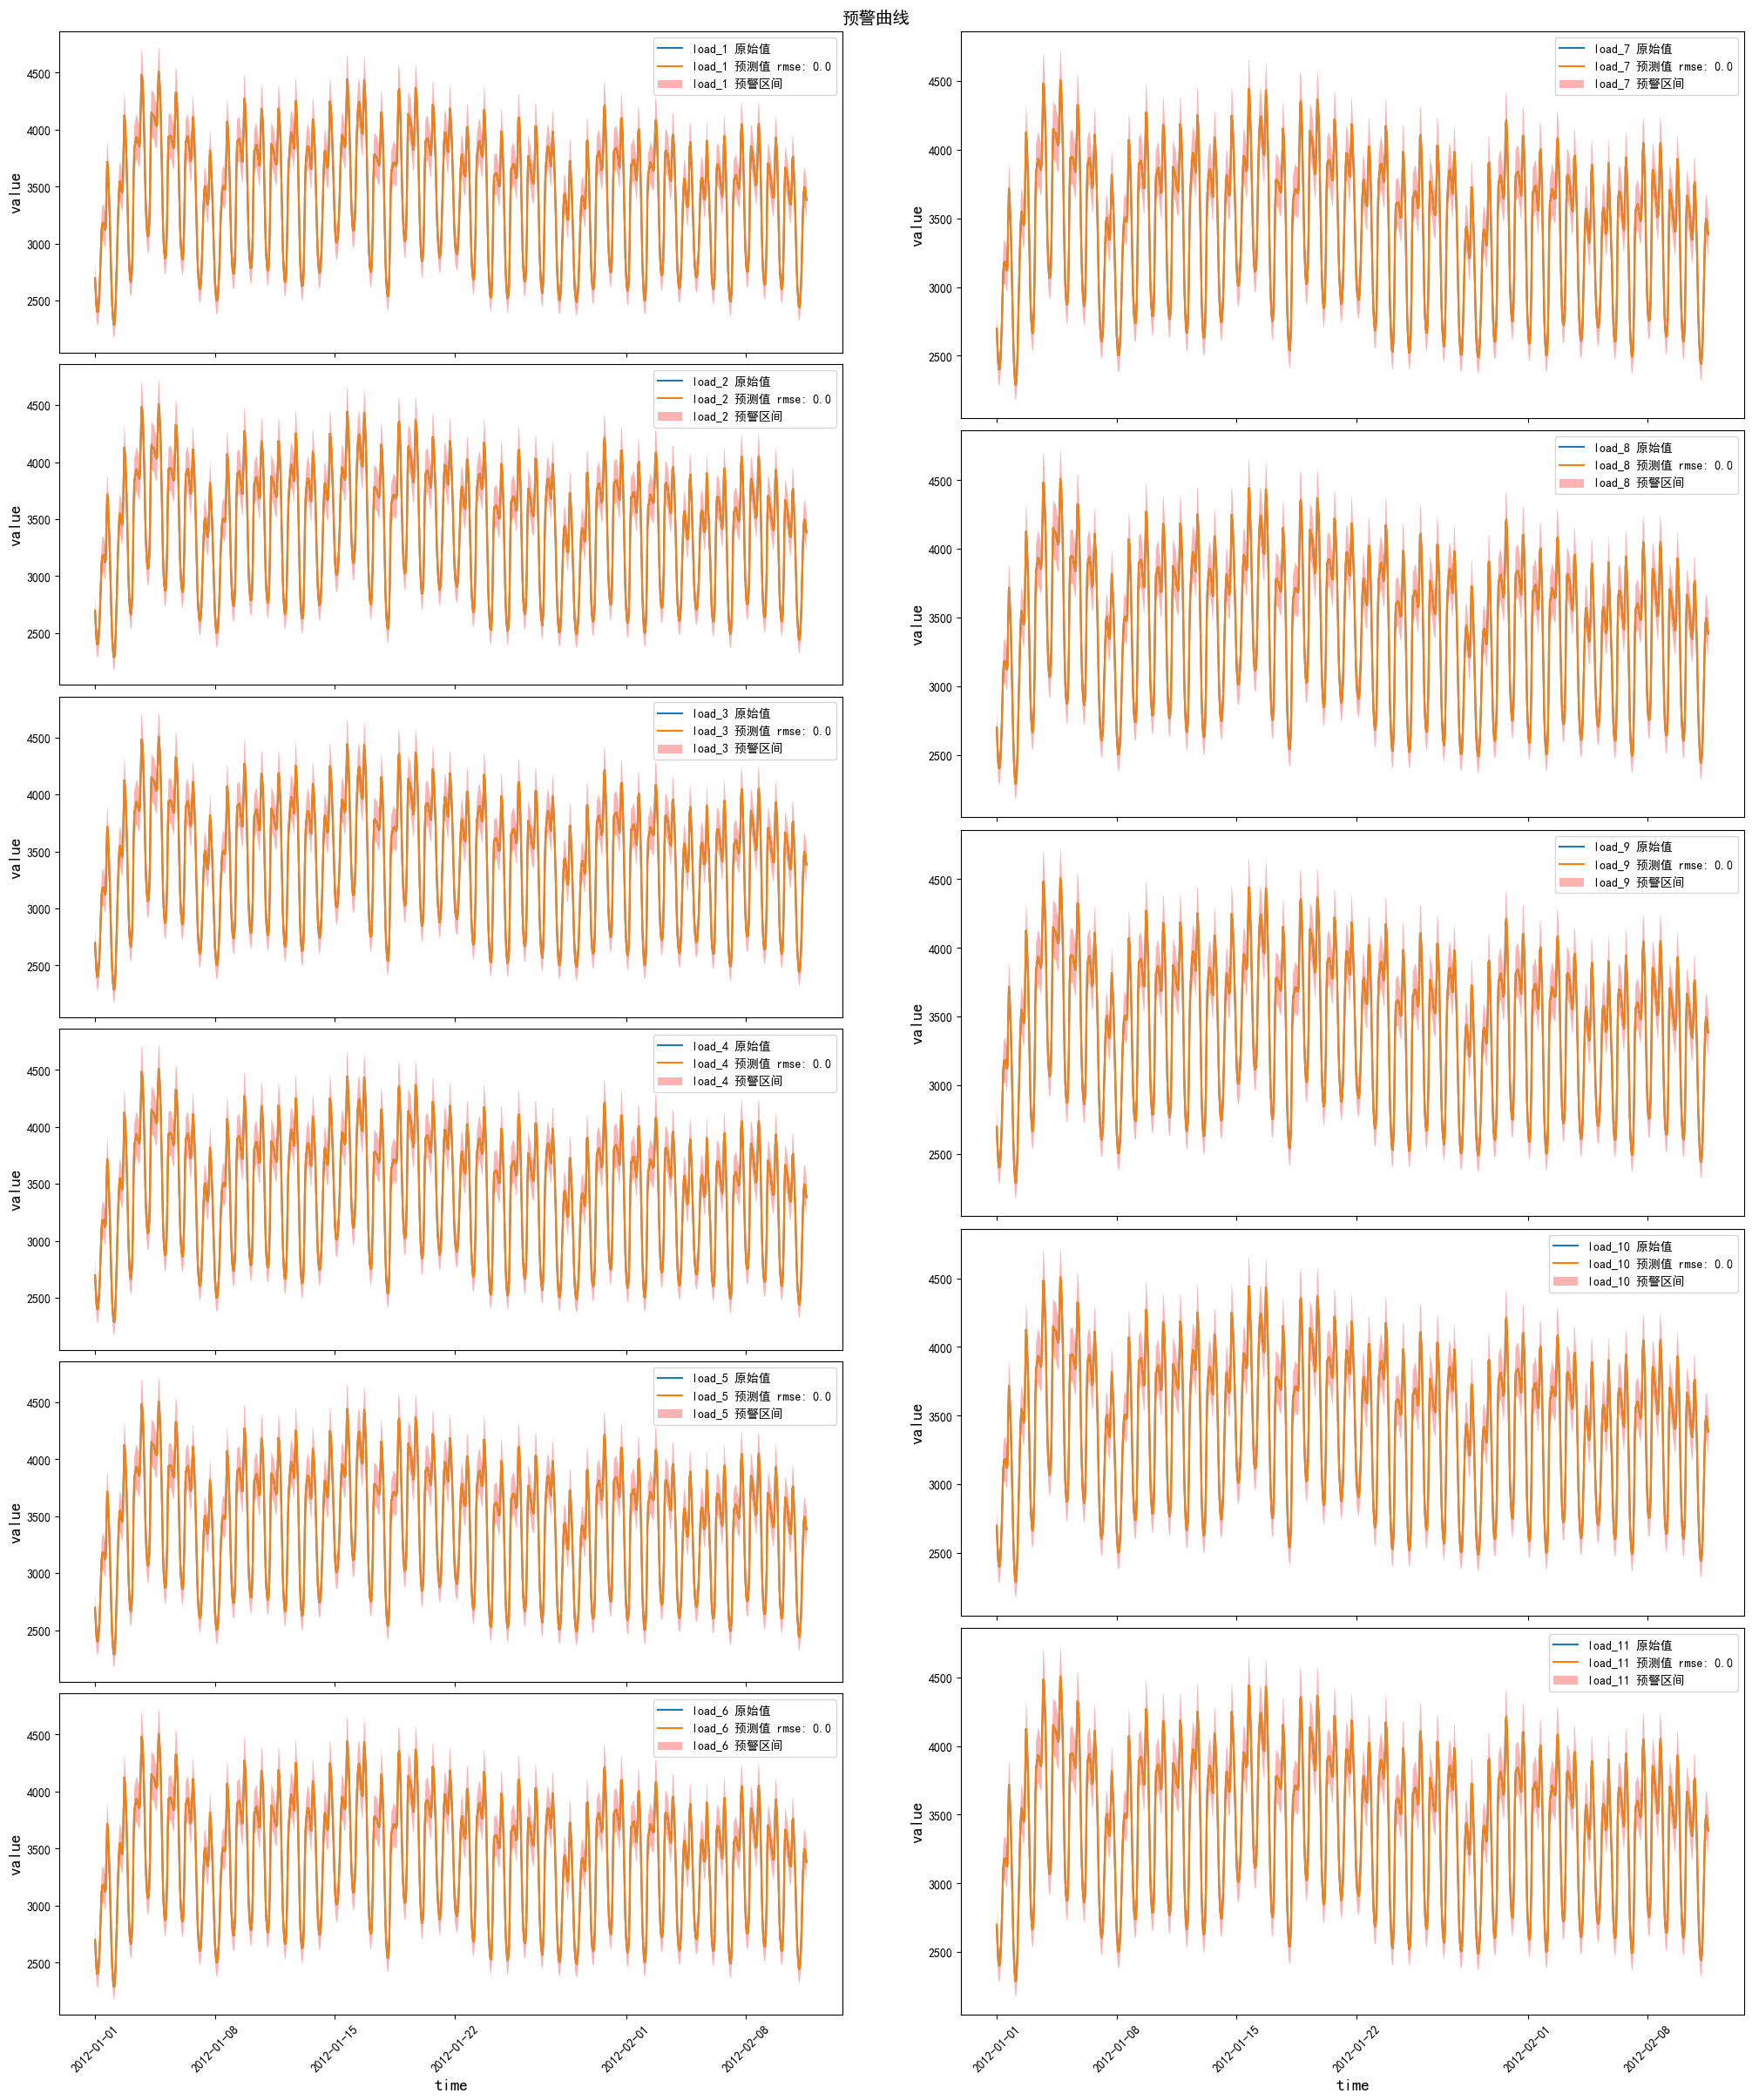

0

In [13]:
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# 绘制子图
def __axs_plot(axs: ndarray,
               nums: int,
               x_in: DataFrame,
               x_out: DataFrame,
               time_col: Union[str, None],
               x_time: ndarray,
               y_label: str,
               threshold: float = 0.05):
    """
    绘制子图函数

    参数说明
    ----------
    axs : {numpy.ndarray}
        绘图示例
    nums : {int}
        绘制子图的个数
    x_in : {DataFrame} of shape (n_samples, n_features)
        实际值
    x_out : {DataFrame} of shape (n_samples, n_features)
        预测值
    time_col : {str}
        时间列
    x_time : {numpy.ndarray}
        x轴的值
    y_label : {str}
        y轴标签
    threshold : {float}
        超限阈值比例

    返回值
    -------
    None
    """
    if nums > 1:
        for nn, ax in enumerate(axs):
            true = x_in.iloc[:, nn].values.astype("float")
            predict = x_out.iloc[:, nn].values.astype("float")
            # 选择数据，同一张子图需要绘制实际值和预测值曲线
            ax.plot(x_time, true)
            ax.plot(x_time, predict)
            # 绘制x轴标签
            if nn == nums - 1:
                ax.set_xlabel(time_col, fontsize=14)
            # 绘制y轴标签
            ax.set_ylabel('value', fontsize=14)
            # 绘制预测阈值带（安全范围的区间）
            ax.fill_between(x_time,
                            predict - predict * threshold,
                            predict + predict * threshold,
                            facecolor='red',
                            alpha=0.3)
            # 绘制图例
            rmse = round(score(pd.DataFrame(true), pd.DataFrame(predict)), 3)
            ax.legend([
                y_label[nn] + " 原始值",
                y_label[nn] + " 预测值" + " rmse: " + str(rmse),
                y_label[nn] + " 预警区间"
            ])
            # x轴文字旋转方向
            for xtick in ax.get_xticklabels():
                xtick.set_rotation(45)
    else:
        # 选择数据，同一张子图需要绘制实际值和预测值曲线
        if type(y_label) == list:
            y_label = y_label[0]
        true = x_in[y_label].values.astype("float").reshape((-1, ))
        predict = x_out[y_label].values.astype("float").reshape((-1, ))
        axs.plot(x_time, true)
        axs.plot(x_time, predict)
        # 绘制x轴标签
        axs.set_xlabel(time_col, fontsize=14)
        # 绘制y轴标签
        axs.set_ylabel('value', fontsize=14)
        # 绘制预测阈值带（安全范围的区间）
        axs.fill_between(x_time,
                         predict - predict * threshold,
                         predict + predict * threshold,
                         facecolor='red',
                         alpha=0.3)
        # 绘制图例
        rmse = round(score(pd.DataFrame(true), pd.DataFrame(predict)), 3)
        axs.legend([
            y_label + " 原始值", y_label + " 预测值" + " rmse: " + str(rmse),
            y_label + " 预警区间"
        ])
        # x轴文字旋转方向
        for xtick in axs.get_xticklabels():
            xtick.set_rotation(45)

    return 0


# 计算评估指标
def score(x1: DataFrame,
          x2: DataFrame,
          time_col: Union[str, None] = None,
          eval_metrics: str = 'rmse',
          is_printing: bool = False) -> float:
    """
    计算评估指标

    参数说明
    ----------
    x1 : {DataFrame} of shape (n_samples, n_features)
        输入数据
    x2 : {DataFrame} of shape (n_samples, n_features)
        预测数据
    time_col : {str}
        时间标签，如果为None，默认数据中不含时间特征
    eval_metrics : {str}
        评估指标值，可选'r2'和'rmse'
    is_printing : {bool}
        是否打印评估值，默认不打印

    返回值
    -------
    eval_value : {float}
        评估值
    """

    # 输入数据判断类型
    if not isinstance(x1, DataFrame):
        raise TypeError('x1 should be of DataFrame type!')
    if not isinstance(x2, DataFrame):
        raise TypeError('x2 should be of DataFrame type!')
    if not isinstance(time_col, (type(None), str)):
        raise TypeError('time_col should be of str type!')
    if eval_metrics not in ['r2', 'rmse']:
        raise ValueError('eval_metrics should be one of "r2" or "rmse"!')

    # 规范化数据
    x1 = x1.reset_index(drop=True)
    x2 = x2.reset_index(drop=True)

    # 选取时间列
    if time_col != None:
        no_time_cols = [i for i in x1.columns if i != time_col]
        x1[time_col] = pd.to_datetime(x1[time_col])
        x1_no_time = x1.loc[:, no_time_cols].values.astype('float32')
        x2[time_col] = pd.to_datetime(x2[time_col])
        x2_no_time = x2.loc[:, no_time_cols].values.astype('float32')
    else:
        x1_no_time = x1.values.astype('float32')
        x2_no_time = x2.values.astype('float32')

    # 缺失值删除
    x1_not_nan_index = np.where(~np.isnan(x1_no_time))[0]
    x2_not_nan_index = np.where(~np.isnan(x2_no_time))[0]
    not_nan_index = list(set(x1_not_nan_index) & set(x2_not_nan_index))
    x1_not_nan = x1_no_time[not_nan_index]
    x2_not_nan = x2_no_time[not_nan_index]

    # 计算评估指标
    if eval_metrics == 'r2':
        eval_value = r2_score(x1_not_nan, x2_not_nan)
    elif eval_metrics == 'rmse':
        eval_value = np.sqrt(mean_squared_error(x1_not_nan, x2_not_nan))

    # 打印评估值
    if is_printing:
        print('评估值为：{:.3f}'.format(eval_value))

    return eval_value


# 绘制曲线
def plot(x_in: DataFrame,
         x_out: DataFrame,
         time_col: Union[str, None] = None,
         plot_cols: Union[List[str], None] = None,
         is_subplotting: bool = True,
         threshold: float = 0.05) -> None:
    """
    绘制实际值和预测值曲线

    参数说明
    ----------
    x_in : {DataFrame} of shape (n_samples, n_features)
        输入数据
    x_out : {DataFrame} of shape (n_samples, n_features)
        预测数据
    time_col : {str}
        时间标签，如果为None，默认数据中不含时间特征
    plot_cols : {Union[List[str], None]}
        需要绘制的特征列，如果为None，默认不绘制
    is_subplotting : {bool}
        是否绘制子图，如果为False，不绘制，默认绘制
    threshold : {float}
        预警阈值比例

    返回值
    -------
    None
    """
    # 输入数据判断类型
    if not isinstance(x_in, DataFrame):
        raise TypeError('x_in should be of DataFrame type!')
    if not isinstance(x_out, DataFrame):
        raise TypeError('x_out should be of DataFrame type!')
    if not isinstance(time_col, (type(None), str)):
        raise TypeError('time_col should be of str type!')
    if not isinstance(plot_cols, (list, type(None))):
        raise TypeError('plot_cols should be of list type!')
    if not isinstance(is_subplotting, bool):
        raise TypeError('is_subplotting should be of bool type!')
    if not isinstance(threshold, float):
        raise TypeError('threshold should be of float type!')

    # 选择数据
    if plot_cols == None:
        raise ValueError('请选择需要绘制的点，不能为空！')
    no_time_cols = [i for i in plot_cols if i != time_col]
    x_in[time_col] = pd.to_datetime(x_in[time_col])
    x_time = x_in[time_col]
    x_in = x_in[no_time_cols]
    x_out = x_out[no_time_cols]

    # 子图个数
    axs_nums = len(no_time_cols)

    # 分成左右两块画布
    if axs_nums > 1 and is_subplotting:
        # 左右子图个数
        if axs_nums > 1 and axs_nums % 2 == 0:
            axsLeft_nums = axsRight_nums = int(axs_nums / 2)
        else:
            axsRight_nums = int((axs_nums - 1) / 2)
            axsLeft_nums = axs_nums - axsRight_nums
        # 创建画布，支持左右布局
        fig = plt.figure(constrained_layout=True,
                         figsize=(20, 4 * axsLeft_nums))
        subfigs = fig.subfigures(1, 2, wspace=0.07)
        # 左子图
        axsLeft = subfigs[0].subplots(axsLeft_nums, 1, sharex=True)
        __axs_plot(axsLeft, axsLeft_nums, x_in.iloc[:, :axsLeft_nums],
                   x_out.iloc[:, :axsLeft_nums], time_col, x_time,
                   no_time_cols[:axsLeft_nums], threshold)
        # 右子图
        axsRight = subfigs[1].subplots(axsRight_nums, 1, sharex=True)
        __axs_plot(axsRight, axsRight_nums, x_in.iloc[:, axsLeft_nums:],
                   x_out.iloc[:, axsLeft_nums:], time_col, x_time,
                   no_time_cols[axsLeft_nums:], threshold)
        # 绘制表头
        fig.suptitle('预警曲线', fontsize=14)
    else:
        # 创建画布，支持单一画布
        if axs_nums == 1:
            no_time_cols = no_time_cols[0]
        fig = plt.figure(constrained_layout=True, figsize=(10, 4 * axs_nums))
        axs = fig.subplots(axs_nums, 1, sharex=True)
        __axs_plot(axs, axs_nums, x_in, x_out, time_col, x_time, no_time_cols,
                   threshold)
        # 绘制表头
        fig.suptitle('预警曲线', fontsize=14)
    plt.show()

    return 0

param = {
    'x_in': data,
    'x_out': data,
    'time_col': 'time',
    'plot_cols': list(data.columns),
    'is_subplotting': True
}
plot(**param)

# 示例十八

In [2]:
data = pd.read_csv('../data/energy2.csv', encoding='gbk')

In [3]:
from pandas import DataFrame
from numpy import ndarray
from typing import Union, List, Dict
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei']#显示中文标签 
plt.rcParams['axes.unicode_minus']=False


# 绘制子图
def __axs_plot(axs: ndarray, nums: int, x_in: DataFrame,
               time_col: Union[str, None], x_time: ndarray, y_label: str):
    """
    绘制子图函数

    参数说明
    ----------
    axs : {numpy.ndarray}
        绘图示例
    nums : {int}
        绘制子图的个数
    x_in : {DataFrame} of shape (n_samples, n_features)
        实际值
    time_col : {str}
        时间列
    x_time : {numpy.ndarray}
        x轴的值
    y_label : {str}
        y轴标签

    返回值
    -------
    None
    """
    if nums > 1:
        for nn, ax in enumerate(axs):
            true = x_in.iloc[:, nn].values.astype("float")
            # 选择数据，同一张子图需要绘制实际值和预测值曲线
            ax.plot(x_time, true)
            # 绘制x轴标签
            if nn == nums - 1:
                ax.set_xlabel(time_col, fontsize=14)
            # 绘制y轴标签
            ax.set_ylabel('value', fontsize=14)
            # 绘制图例
            ax.legend([y_label[nn]])
            # x轴文字旋转方向
            for xtick in ax.get_xticklabels():
                xtick.set_rotation(45)
    else:
        # 选择数据，同一张子图需要绘制实际值和预测值曲线
        true = x_in[y_label].values.astype("float")
        axs.plot(x_time, true)
        # 绘制x轴标签
        axs.set_xlabel(time_col, fontsize=14)
        # 绘制y轴标签
        axs.set_ylabel('value', fontsize=14)
        # 绘制图例
        axs.legend([y_label])
        # x轴文字旋转方向
        for xtick in axs.get_xticklabels():
            xtick.set_rotation(45)

    return 0


# 绘制曲线
def plot(x_in: DataFrame, time_col: Union[str, None] = None) -> None:
    """
    绘制原始值曲线

    参数说明
    ----------
    x_in : {DataFrame} of shape (n_samples, n_features)
        输入数据
    time_col : {str}
        时间标签，如果为None，默认数据中不含时间特征

    返回值
    -------
    None
    """
    # 参数配置
    x_in[time_col] = pd.to_datetime(x_in[time_col])
    x_in = x_in.sort_values(by=time_col)
    no_time_cols = [i for i in x_in.columns if i != time_col]
    x_time = x_in[time_col]
    x_in = x_in[no_time_cols]

    # 子图个数
    axs_nums = len(no_time_cols)

    # 分成左右两块画布
    if axs_nums == 1:
        # 创建画布，支持单一画布
        fig = plt.figure(constrained_layout=True, figsize=(16, 4))
        axs = fig.subplots(axs_nums, 1, sharex=True)
        __axs_plot(axs, axs_nums, x_in, time_col, x_time, no_time_cols[0])
        # 绘制表头
        fig.suptitle('原始值曲线', fontsize=14)
    elif axs_nums > 1 and axs_nums % 2 == 0:
        # 左右子图个数
        axsLeft_nums = axsRight_nums = int(axs_nums / 2)
        # 创建画布，支持左右布局
        fig = plt.figure(constrained_layout=True,
                         figsize=(16, 4 * axsLeft_nums))
        subfigs = fig.subfigures(1, 2, wspace=0.07)
        # 左子图
        axsLeft = subfigs[0].subplots(axsLeft_nums, 1, sharex=True)
        __axs_plot(axsLeft, axsLeft_nums, x_in.iloc[:, :axsLeft_nums],
                   time_col, x_time, no_time_cols[:axsLeft_nums])
        # 右子图
        axsRight = subfigs[1].subplots(axsRight_nums, 1, sharex=True)
        __axs_plot(axsRight, axsRight_nums, x_in.iloc[:, axsRight_nums:],
                   time_col, x_time, no_time_cols[axsRight_nums:])
        # 绘制表头
        fig.suptitle('原始值曲线', fontsize=14)
    else:
        # 左右子图个数
        axsLeft_nums = axsRight_nums = int((axs_nums - 1) / 2)
        # 创建画布，支持左右下布局
        fig = plt.figure(constrained_layout=True,
                         figsize=(16, 4 * axsLeft_nums))
        subfigs = fig.subfigures(1, 2, wspace=0.07)
        # 左子图
        axsLeft = subfigs[0].subplots(axsLeft_nums, 1, sharex=True)
        __axs_plot(axsLeft, axsLeft_nums, x_in.iloc[:, :axsLeft_nums],
                   time_col, x_time, no_time_cols[:axsLeft_nums])
        # 右子图
        axsRight = subfigs[1].subplots(axsRight_nums, 1, sharex=True)
        __axs_plot(axsRight, axsRight_nums, x_in[no_time_cols[axsRight_nums:]],
                   time_col, x_time, no_time_cols[axsRight_nums:])
        # 绘制表头
        fig.suptitle('原始值曲线', fontsize=14)
        # 剩余一张图
        fig = plt.figure(constrained_layout=True, figsize=(16, 4))
        axs = fig.subplots(1, 1, sharex=True)
        __axs_plot(axs, 1, x_in[[no_time_cols[-1]]], time_col, x_time,
                   no_time_cols[-1])

    plt.show()

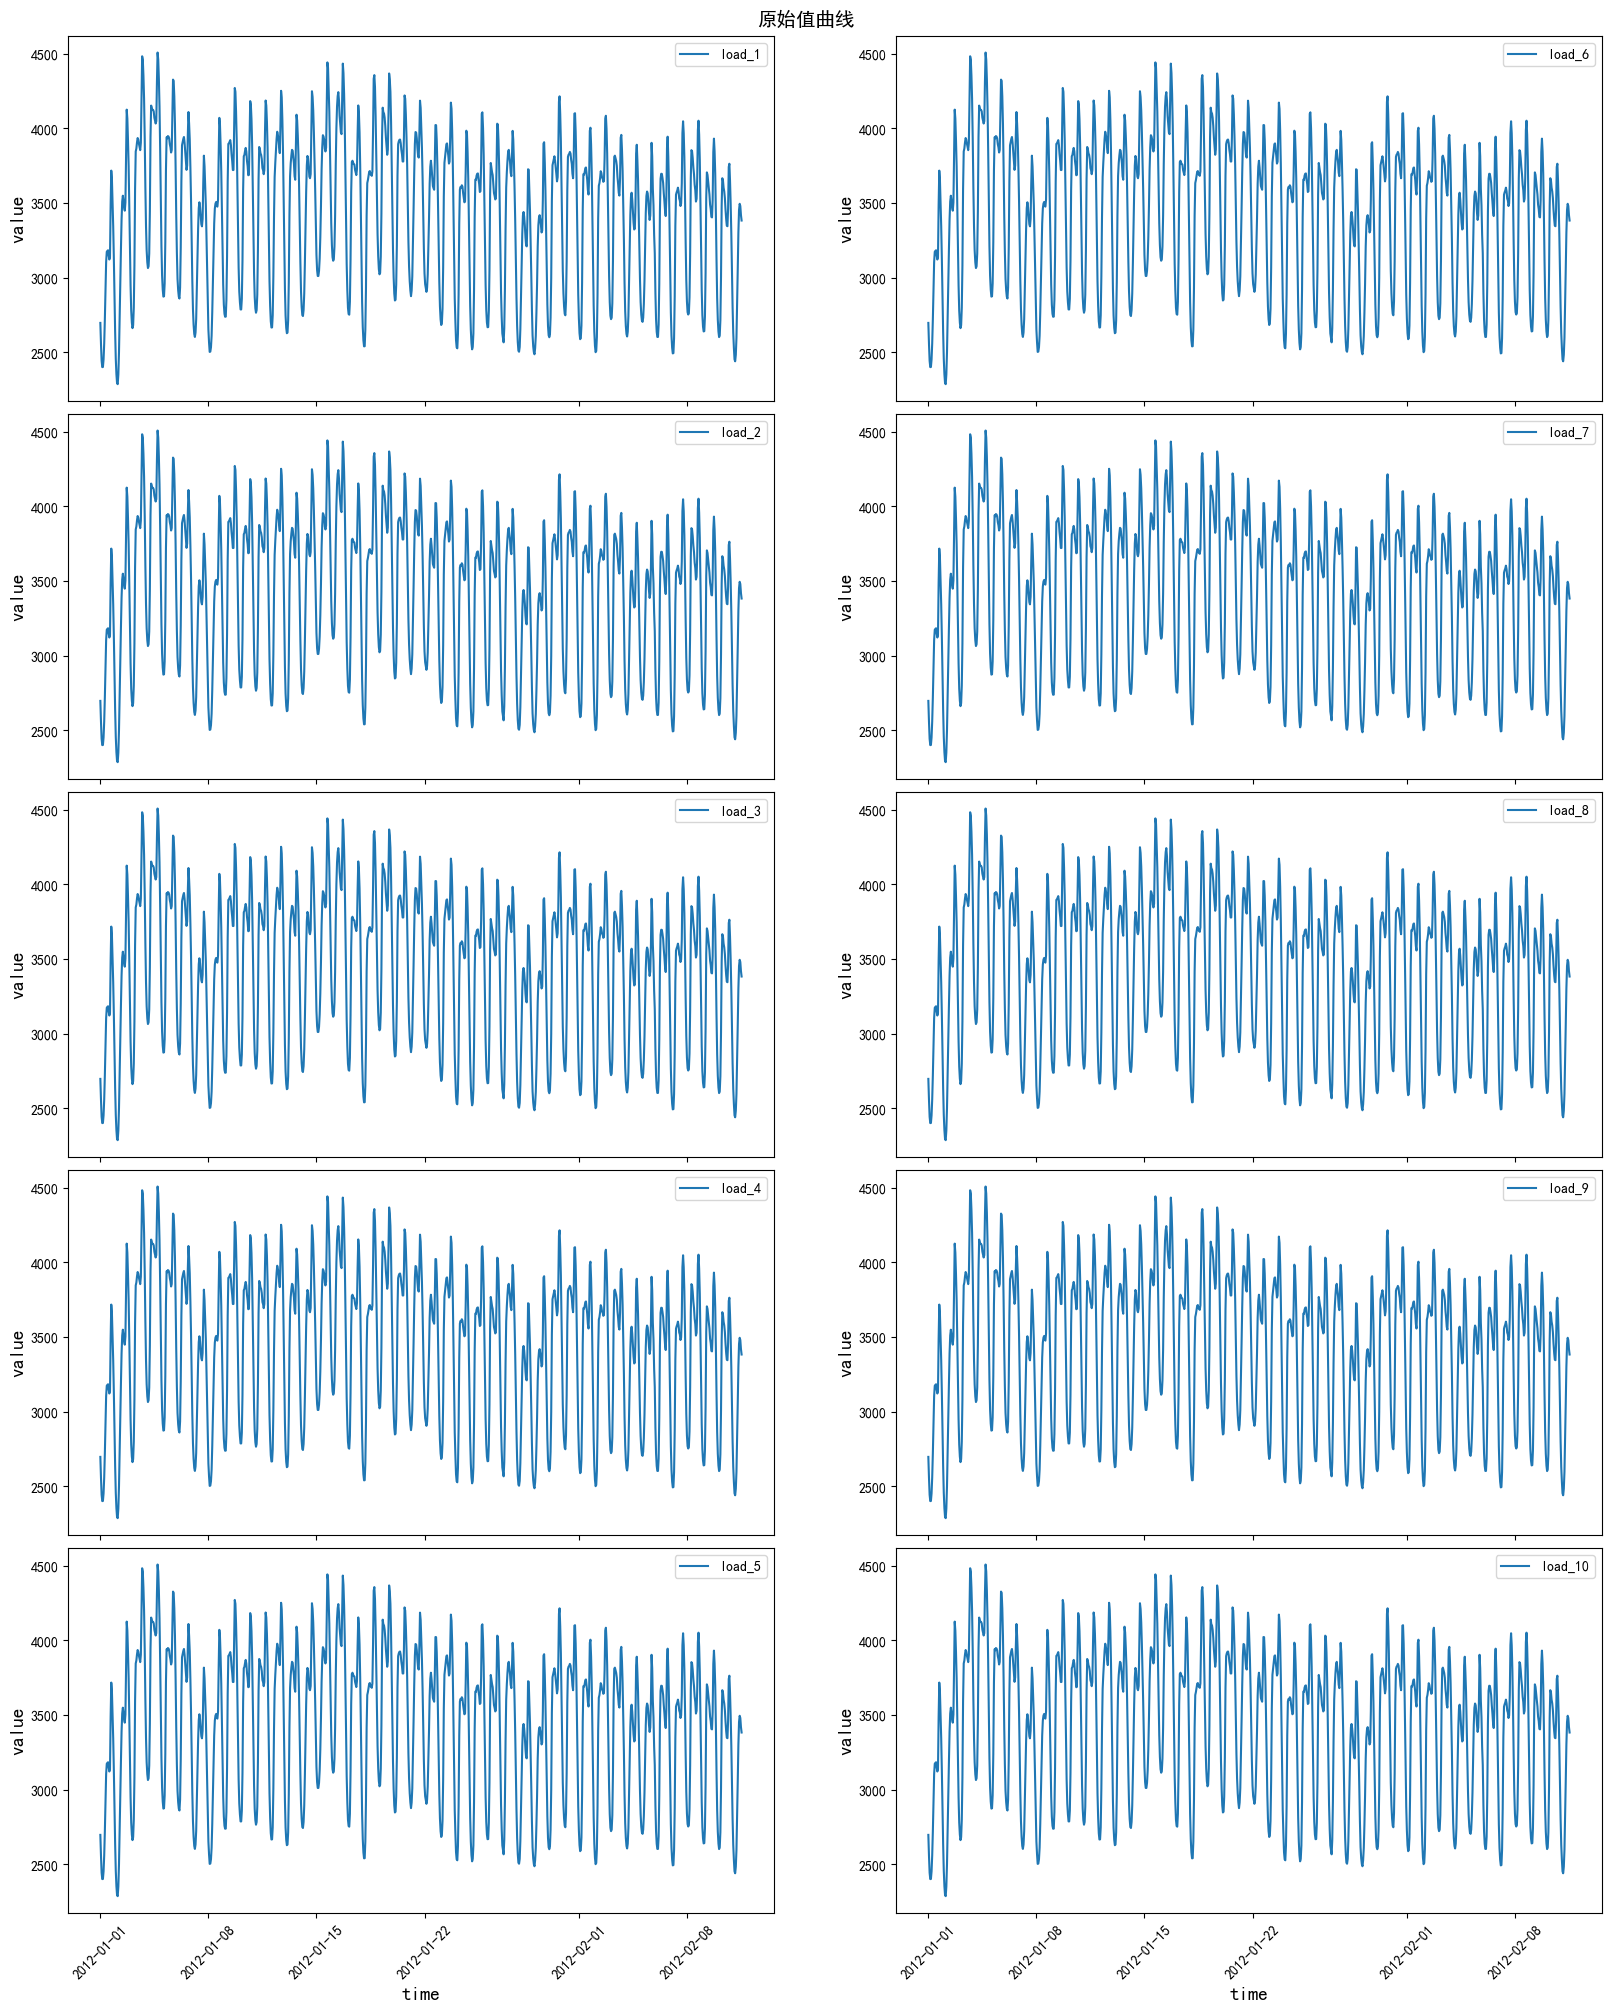

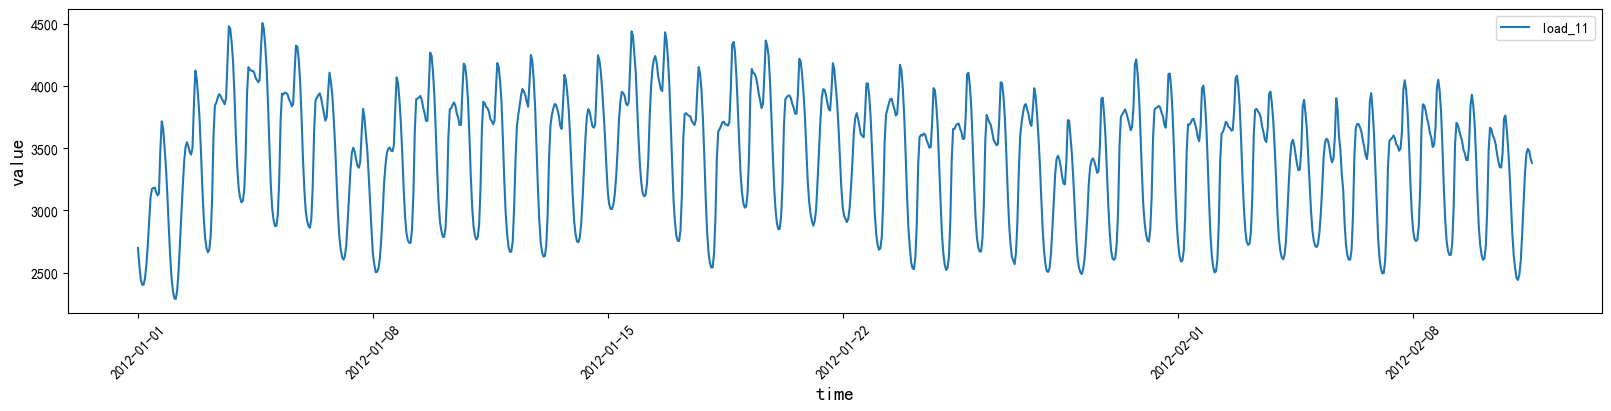

In [18]:
plot(data, 'time')